In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("No. of training examples = ",x_train.shape[0])
print("Size of each image in dataset = ",x_train.shape[1:])
print("No. of test examples = ",x_test.shape[0])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
No. of training examples =  60000
Size of each image in dataset =  (28, 28)
No. of test examples =  10000


label: 4       7       4       4       1       

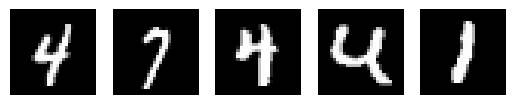

In [ ]:
n = 5

index = np.random.choice(x_train.shape[0],5)
print("label: ",end="")

for i,ind in enumerate(index):
    plt.subplot(1,n,i+1)
    plt.imshow(x_train[ind],cmap="gray")
    plt.axis("off")
    print(y_train[ind],end="       ")

plt.show()

In [ ]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)
n_validation = 10000

x_validation = x_train_flatten[:n_validation]
y_validation = y_train[:n_validation]

x_train_flatten = x_train_flatten[n_validation:]
y_train = y_train[n_validation:]

print("Size of each image in dataset = ", x_train.shape[1:])
print("No. of training examples =", x_train_flatten.shape[0])
print("No. of validation examples =", x_validation.shape[0])
print("No. of test examples =", x_test.shape[0])

Size of each image in dataset =  (28, 28)
No. of training examples = 50000
No. of validation examples = 10000
No. of test examples = 10000


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

n_epochs = 10
batch_size = 512

history = model.fit(
    x_train_flatten, y_train,
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=(x_validation, y_validation),
    verbose=1
)


ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 50000
'y' sizes: 30000


In [ ]:
results = model.evaluate(x_test_flatten, y_test)
print("Loss = ", results[0])
print("Accuracy = ", results[1] * 100, "%")

plt.plot(history.history['accuracy'], label="Training Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label="Training Loss")
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0843 - loss: 107.0016
Loss =  112.7437744140625
Accuracy =  7.769999653100967 %


NameError: name 'history' is not defined

Actual Labels: 
4       2       5       9       6       

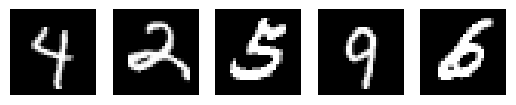


Predicted Labels: 
8       8       6       1       8       

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = 5

index = np.random.choice(x_test.shape[0], n)

print("Actual Labels: ")
for i, ind in enumerate(index):
    plt.subplot(1, n, i + 1)
    plt.imshow(x_test[ind], cmap="gray")
    plt.axis("off")
    print(y_test[ind], end="       ")

plt.show()

print("\nPredicted Labels: ")

for i, ind in enumerate(index):

    img = x_test[ind].reshape(1, 784)

    prediction = model.predict(img, verbose=0)

    digit = np.argmax(prediction)

    print(digit, end="       ")
